In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import os

# Importing and Prepping the Data

In [ ]:
n_classes=10
batch_size=32
epochs=100

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#X_train = X_train_full[:40000] / 255
#X_val = X_train_full[40000:] / 255

#y_train = y_train_full[:40000] 
#y_val = y_train_full[40000:] 

#X_test = X_test /255

In [ ]:
#X_train = X_train.astype('float32')
#X_val = X_val.astype('float32')
#X_test = X_test.astype('float32')

In [ ]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [ ]:
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


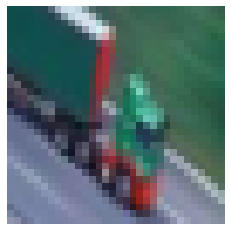

In [ ]:
print(y_train[50])
plt.imshow(X_train[50])
plt.axis('off')
plt.show()

In [ ]:
keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

# CNN Model

In [ ]:
model = keras.models.Sequential([
                    keras.layers.Conv2D(16, (3,3), activation='relu', 
                                                    input_shape=X_train[0].shape, padding='same'),
                    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPooling2D(2, 2),
                    keras.layers.Dropout(.4),

                    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
                    keras.layers.Conv2D(32, (3, 3), activation='relu'),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPooling2D(2, 2),
                    keras.layers.Dropout(.4),

                    keras.layers.Flatten(),
                    keras.layers.Dense(512, activation='relu'),
                    keras.layers.Dropout(.4),
                    keras.layers.Dense(n_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

In [ ]:
train_datagen = ImageDataGenerator(
                                  rotation_range=15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                  )

In [ ]:
train_datagen.fit(X_train)

In [ ]:
optimiser = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(train_datagen.flow(X_train, y_train), epochs=epochs, 
                validation_data=train_datagen.flow(X_test, y_test), 
                shuffle=True, batch_size=batch_size,
                callbacks= callback)

Epoch 1/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8734 - accuracy: 0.3391 - val_loss: 1.7548 - val_accuracy: 0.4126
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6018 - accuracy: 0.4298 - val_loss: 1.4007 - val_accuracy: 0.4914
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4899 - accuracy: 0.4709 - val_loss: 1.6376 - val_accuracy: 0.4656
Epoch 4/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3709 - accuracy: 0.5115 - val_loss: 1.2460 - val_accuracy: 0.5558
Epoch 5/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2710 - accuracy: 0.5511 - val_loss: 1.2925 - val_accuracy: 0.5461
Epoch 6/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1983 - accuracy: 0.5729 - val_loss: 1.2294 - val_accuracy: 0.5778
Epoch 7/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1509 - accuracy: 0.5948 - val_loss: 1

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9864 - accuracy: 0.7161


[0.986380398273468, 0.7160999774932861]

# Learing Curve 

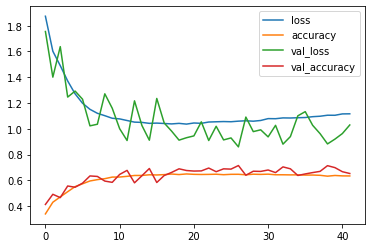

In [20]:
pd.DataFrame(history.history).plot()
plt.show()

# Save Model

In [24]:
dir = '/tmp/'
save_name = 'CIFAR10model.h5'
model_path = os.path.join(dir, save_name)

model.save(model_path)

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(model_path)